In [2]:
import matplotlib.pyplot as plt
import numpy as np

import checker
import utils

# Proszę nie zmieniać seedu, to nam zapewni, ze bedzięmy pracować na tych samych datasetach
np.random.seed(60)

# Pierwszy zbiór wygenerujemy, losując punkty z rozkładu jednostajnego
train_set_1d = np.random.uniform(-5, 5, size=(15, 1))

# Drugi zbiór wygenerujemy, losując punkty z rozkładu normalnego
train_set_2d = np.random.normal(-1, 3, size=(13, 2))

# Trzeci zbiór wygenerujemy, losując punkty z rozkładu wykładniczego
train_set_10d = np.random.exponential(2, size=(31, 10))
print(train_set_10d[:5, 0])

train_sets = [train_set_1d, train_set_2d, train_set_10d]

print("Parę punktów z datasetu jednowymiarowego:\n", train_set_1d[:5])
print("Parę punktów z datasetu dwuwymiarowego:\n", train_set_2d[:5])
print("Parę punktów z datasetu dziesięciowymiarowego:\n", train_set_10d[:3])

shapes = [dataset.shape for dataset in train_sets]
print("Rozmiary naszych datasetów:", *shapes)
# Pierwszy wymiar reprezentuje liczbę przykładów w datasecie
# Drugi wymiar to wymiar pojedynczego przykładu z datasetu

[1.92650794 2.29209159 0.61110025 3.247719   2.8237559 ]
Parę punktów z datasetu jednowymiarowego:
 [[-1.9912667 ]
 [-3.13054184]
 [-1.76817323]
 [ 1.6574957 ]
 [ 0.66970801]]
Parę punktów z datasetu dwuwymiarowego:
 [[-6.53671154 -0.99144149]
 [-0.96583933 -5.57674233]
 [ 3.14309184  3.15486672]
 [-0.54717522 -3.33306574]
 [-2.49814889  1.45508802]]
Parę punktów z datasetu dziesięciowymiarowego:
 [[1.92650794e+00 2.04239361e+00 3.08092423e+00 5.25508663e+00
  3.64143504e+00 6.58350040e+00 1.60976207e+00 5.96230107e-02
  3.09291354e-01 1.27706253e+00]
 [2.29209159e+00 2.33170339e+00 2.58977125e+00 9.09622883e+00
  9.97396514e-01 1.44048016e+00 5.07452038e+00 9.77349522e-01
  1.18453053e+00 1.18764669e+00]
 [6.11100253e-01 5.28521620e+00 1.45147908e+00 2.18205193e+00
  3.57100011e+00 6.84691549e-03 1.74968831e+00 1.33940689e+00
  6.39317013e-01 6.50040435e-01]]
Rozmiary naszych datasetów: (15, 1) (13, 2) (31, 10)


In [5]:
# Sprawdźmy czy datasety wylosowały się z poprawnego seedu.
similar_vals_1d = np.all(np.isclose(
    train_set_1d[:5, 0],
    np.array([-1.9912666995338126, -3.13054183658122, -1.7681732303178057, 1.6574957028830903, 0.6697080096921333])
))

similar_vals_2d = np.all(np.isclose(
    train_set_2d[:5, 0],
    np.array([-6.53671154, -0.96583933, 3.14309184, -0.54717522, -2.49814889])
))

similar_vals_10d = np.all(np.isclose(
    train_set_10d[:5, 0],
    np.array([1.92650794, 2.29209159, 0.61110025, 3.247719, 2.8237559])
))
assert similar_vals_1d and similar_vals_2d and similar_vals_10d, \
    "Wylosowane wartości są złe! Zgłoś od razu problem prowadzącemu!"

In [4]:
from numpy import linalg as LA

def mean_error(X, v):
    return LA.norm((X-v), ord=2, axis=1).mean()

def mean_squared_error(X, v):
    norms = LA.norm(X-v, ord=2, axis=1)
    return (norms**2).mean()

def max_error(X, v):
    return max(LA.norm(X-v, ord=2, axis=1))

checker.check_1_1(mean_error, mean_squared_error, max_error, train_sets)

In [5]:
def minimize_mse(X):
    return np.sum(X)/X.size

def minimize_me(X):
    return np.median(X)

def minimize_max(X):
    return (np.amax(X)+np.amin(X))/2

checker.check_1_2(minimize_me, minimize_mse, minimize_max, train_set_1d)

In [ ]:
def me_grad(X, v):
    N = X.shape[0]
    temp = X - v
    for i in range(N):
        temp[i] = (-1/N)*temp[i]/LA.norm(temp[i], ord=2)
    grad = np.sum(temp, axis=0)
    return grad

def mse_grad(X, v):
    N = X.shape[0]
    temp = X - v
    for i in range(N):
        temp[i] = (-2/N)*temp[i]
    grad = np.sum(temp, axis=0)
    return grad

def max_grad(X, v):
    max = v
    for xi in X:
        if LA.norm(xi-v, ord=2) > LA.norm(max-v, ord=2):
            max = xi
    return (v-max)/LA.norm(v-max, ord=2)

checker.check_1_3(me_grad, mse_grad, max_grad, train_sets)

Final_v: [-0.89616116]
 Minimize_mse: -0.8973529235541698
Final_v: [-0.89669572]
 Minimize_mse: -0.8973529235541698


Text(0.5, 1.0, '1d run, lr=0.9995544433593749')

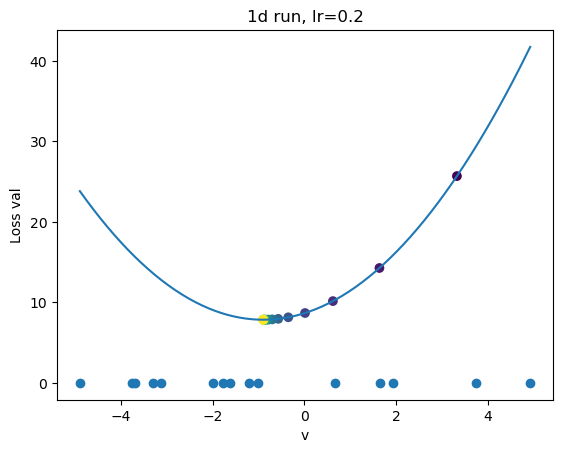

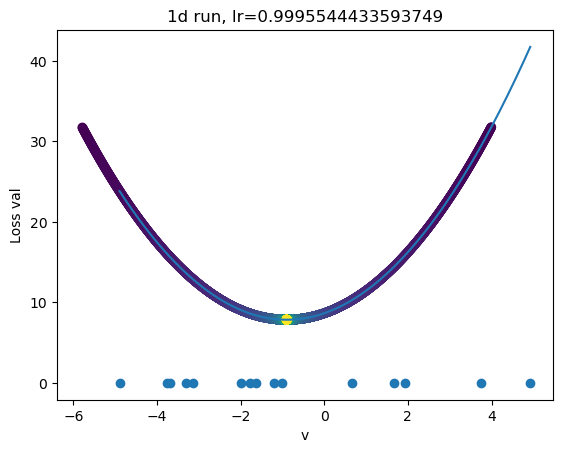

In [22]:
def gradient_descent(grad_fn, dataset, learning_rate=0.2, num_steps=100):
    """
    grad_fn: funkcja z poprzedniego zadania - przyjmuje dataset
    dataset: zbiór treningowy na którym trenujemy
    learning_rate: prędkość uczenia, określa jak długi krok gradientu mamy robić
    num_steps: liczba kroków metody.
    """
    current_v = np.random.normal(4, size=(dataset.shape[1]))
    all_v = [current_v]

    for step_idx in range(num_steps):
        grad = grad_fn(dataset, current_v)  # liczenie gradientu
        current_v = current_v - learning_rate*grad  # krok metody gradientu

        all_v += [current_v]
        if np.linalg.norm(all_v[-1] - all_v[-2]) < 1e-3:
            break

    final_grad = grad
    final_v = current_v
    print(f"Final_v: {final_v}\n Minimize_mse: {minimize_mse(dataset)}")
    all_v = np.array(all_v)
    return final_v, final_grad, all_v

fig, ax = plt.subplots(1, 1)
utils.plot_gradient_steps_1d(
    ax, train_set_1d,
    gradient_descent, mse_grad, mean_squared_error,
    learning_rate=0.2, num_steps=10000)
ax.set_title("1d run, lr=0.2")

def ok_learning_rate(learning_rate):
    current_v = np.random.normal(4, size=(train_set_1d.shape[1]))
    all_v = [current_v]

    for step_idx in range(10000):
        grad = mse_grad(train_set_1d, current_v)  # liczenie gradientu
        current_v = current_v - learning_rate*grad  # krok metody gradientu
        all_v += [current_v]

        if np.linalg.norm(all_v[-1] - all_v[-2]) < 1e-3:
            return True
        if np.linalg.norm(all_v[-2] - minimize_mse(train_set_1d)) < np.linalg.norm(all_v[-1] - minimize_mse(train_set_1d)):
            return False

max_learning_rate = 0.2

while ok_learning_rate(max_learning_rate):
    max_learning_rate *= 2

R = max_learning_rate
L = R/2

while R-L > 1e-5:
    max_learning_rate = (R+L)/2
    if ok_learning_rate(max_learning_rate):
        L = max_learning_rate
    else:
        R = max_learning_rate


fig, ax = plt.subplots(1, 1)
utils.plot_gradient_steps_1d(
    ax, train_set_1d,
    gradient_descent, mse_grad, mean_squared_error,
    learning_rate=max_learning_rate, num_steps=10000)
ax.set_title(f"1d run, lr={max_learning_rate}")